In [1]:
!pip install stim~=1.14
!pip install numpy~=1.0  # 1.0 instead of 2.0 for pymatching compatibility later
!pip install scipy

In [1]:
%load_ext autoreload
%autoreload 2

import stim
import numpy as np
# import matplotlib.pyplot as plt
from stim_utils import *
from stim_simulation_utils import *
from circuit_commons import *
print(stim.__version__)

1.14.0


In [2]:
import importlib.util
import sys


def reload_file(name, path):
    spec = importlib.util.spec_from_file_location(name, path)
    your_file = importlib.util.module_from_spec(spec)
    sys.modules[name] = your_file
    spec.loader.exec_module(your_file)


reload_file("stim_simulation_utils", "stim_simulation_utils.py")
reload_file("stim_utils", "stim_utils.py")


## Creating 1 circuit:

In [3]:
# Initialize the circuit
circuit = init_circuit()

# Encode the logical qubit
encode(circuit)

# Apply noise channel
channel(circuit, 0.5, [0])

# Perform error correction
error_correction(circuit)

# Print the final circuit for verification
print(circuit)

QUBIT_COORDS(0, 0) 0
QUBIT_COORDS(1, 0) 1
QUBIT_COORDS(2, 0) 2
QUBIT_COORDS(3, 0) 3
QUBIT_COORDS(0, 1) 4
QUBIT_COORDS(1, 1) 5
QUBIT_COORDS(2, 1) 6
QUBIT_COORDS(3, 1) 7
QUBIT_COORDS(0, 2) 8
QUBIT_COORDS(1, 2) 9
QUBIT_COORDS(2, 2) 10
QUBIT_COORDS(3, 2) 11
QUBIT_COORDS(0, 3) 12
QUBIT_COORDS(1, 3) 13
QUBIT_COORDS(2, 3) 14
QUBIT_COORDS(3, 3) 15
MPP X0*X1*X2*X3*X4*X5*X6*X7
TICK
MPP X4*X5*X6*X7*X8*X9*X10*X11
TICK
MPP X8*X9*X10*X11*X12*X13*X14*X15
TICK
MPP X0*X1*X4*X5*X8*X9*X12*X13
TICK
MPP X1*X2*X5*X6*X9*X10*X13*X14
TICK
MPP Z0*Z1*Z2*Z3*Z4*Z5*Z6*Z7
TICK
MPP Z4*Z5*Z6*Z7*Z8*Z9*Z10*Z11
TICK
MPP Z8*Z9*Z10*Z11*Z12*Z13*Z14*Z15
TICK
MPP Z0*Z1*Z4*Z5*Z8*Z9*Z12*Z13
TICK
MPP Z1*Z2*Z5*Z6*Z9*Z10*Z13*Z14
TICK
TICK
X_ERROR(0.5) 0
TICK
MPP X0*X1*X2*X3*X4*X5*X6*X7
TICK
MPP X4*X5*X6*X7*X8*X9*X10*X11
TICK
MPP X8*X9*X10*X11*X12*X13*X14*X15
TICK
MPP X0*X1*X4*X5*X8*X9*X12*X13
TICK
MPP X1*X2*X5*X6*X9*X10*X13*X14
TICK
MPP Z0*Z1*Z2*Z3*Z4*Z5*Z6*Z7
TICK
MPP Z4*Z5*Z6*Z7*Z8*Z9*Z10*Z11
TICK
MPP Z8*Z9*Z10*Z11*Z12*Z13*Z14*Z

## plot multiple runs with different error rates

Running simulation for error rate: 0.00
Running simulation for error rate: 0.01
Running simulation for error rate: 0.03
Running simulation for error rate: 0.04
Running simulation for error rate: 0.06
Running simulation for error rate: 0.07
Running simulation for error rate: 0.09
Running simulation for error rate: 0.10
Running simulation for error rate: 0.12
Running simulation for error rate: 0.14
Running simulation for error rate: 0.15
Running simulation for error rate: 0.16
Running simulation for error rate: 0.18
Running simulation for error rate: 0.20
Running simulation for error rate: 0.21
Running simulation for error rate: 0.22
Running simulation for error rate: 0.24
Running simulation for error rate: 0.26
Running simulation for error rate: 0.27
Running simulation for error rate: 0.28
Running simulation for error rate: 0.30


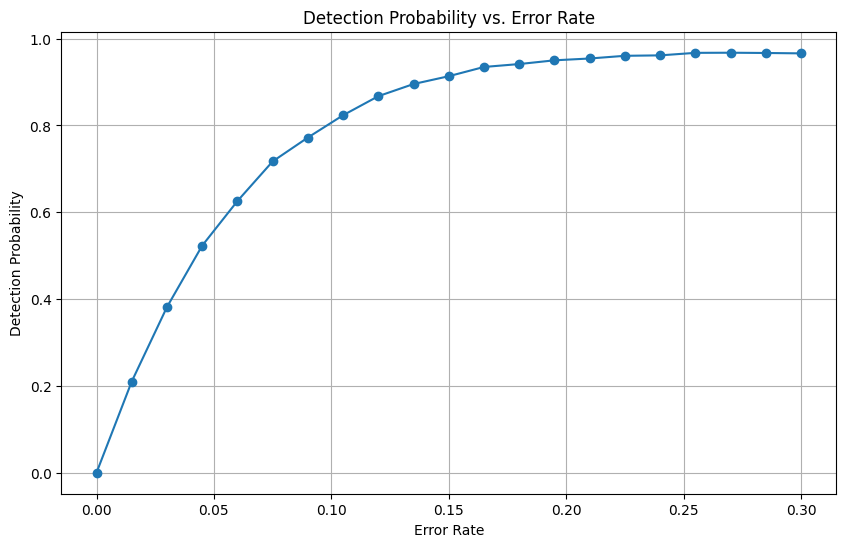

In [53]:
# Initialize the circuit
circuit = init_circuit()

# Encode the logical qubit
encode(circuit)

# Define a range of error rates to test
error_rates = np.linspace(0, 0.3, 21)  # From 0 to 0.2 in steps of 0.01
detection_probabilities = []

# Run the simulation for each error rate
for error_rate in error_rates:
    print(f"Running simulation for error rate: {error_rate:.2f}")
    detection_probability = run_simulation(circuit.copy(), channel, error_correction, error_rate)
    detection_probabilities.append(detection_probability)

# Plot the results
plot_detection_probability(error_rates, detection_probabilities)

## Plot multiple runs with different error rates - fidelity
(probably not correct, was done with help of GPT)

Initialization complete.
Encoding complete.
Calculating fidelity for error rate: 0.00
Noise channel applied.
Error correction complete.
Calculating fidelity for error rate: 0.01
Noise channel applied.
Error correction complete.
Calculating fidelity for error rate: 0.02
Noise channel applied.
Error correction complete.
Calculating fidelity for error rate: 0.03
Noise channel applied.
Error correction complete.
Calculating fidelity for error rate: 0.04
Noise channel applied.
Error correction complete.
Calculating fidelity for error rate: 0.05
Noise channel applied.
Error correction complete.
Calculating fidelity for error rate: 0.06
Noise channel applied.
Error correction complete.
Calculating fidelity for error rate: 0.07
Noise channel applied.
Error correction complete.
Calculating fidelity for error rate: 0.08
Noise channel applied.
Error correction complete.
Calculating fidelity for error rate: 0.09
Noise channel applied.
Error correction complete.
Calculating fidelity for error rate:

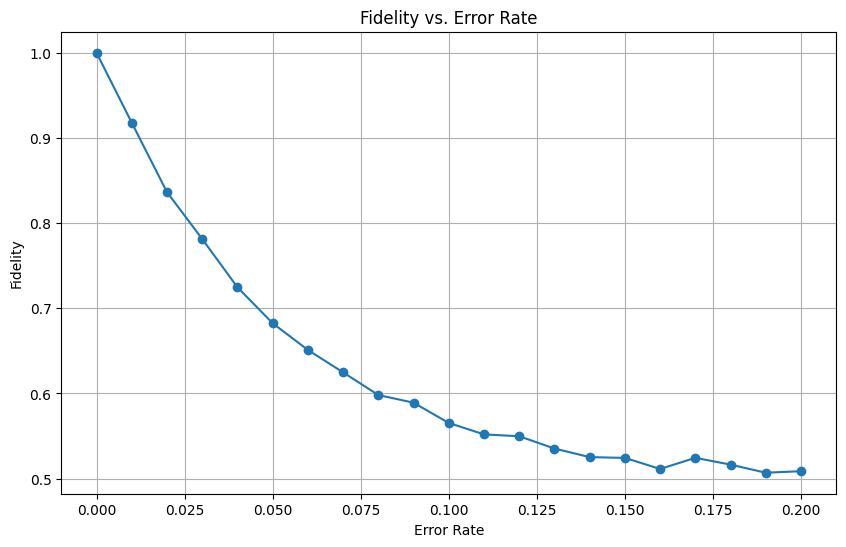

In [23]:
# Initialize the circuit
circuit = init_circuit()
encode(circuit)

# Define a range of error rates to test
error_rates = np.linspace(0, 0.2, 21)
fidelities = []

# Run fidelity calculations for each error rate
for error_rate in error_rates:
    print(f"Calculating fidelity for error rate: {error_rate:.2f}")
    fidelity = calculate_fidelity(circuit.copy(), channel, error_correction, error_rate)
    fidelities.append(fidelity)

# Plot the fidelity results
plot_fidelity(error_rates, fidelities)

In [26]:
circuit.to_crumble_url()

'https://algassert.com/crumble#circuit=Q(0,0)0;Q(1,0)1;Q(2,0)2;Q(3,0)3;Q(0,1)4;Q(1,1)5;Q(2,1)6;Q(3,1)7;Q(0,2)8;Q(1,2)9;Q(2,2)10;Q(3,2)11;Q(0,3)12;Q(1,3)13;Q(2,3)14;Q(3,3)15;H_0_1_2_3_4_8_12;CX_4_20_4_5_4_6_4_7_4_20_8_21_8_9_8_10_8_11_8_21_12_22_12_13_12_14_12_15_12_22_0_16_1_17_2_18_3_19_0_4_1_5_2_6_3_7_0_8_1_9_2_10_3_11_0_12_1_13_2_14_3_15_0_16_1_17_2_18_3_19;R_18_19;H_19;CX_19_18_19_0_19_1_19_2_19_3_19_18;TICK;DEPOLARIZE1(0.5)0;TICK'

In [27]:
sampler = circuit.compile_sampler()
sampler.sample(shots=10)

array([], shape=(10, 0), dtype=bool)

In [146]:
sampler = circuit.compile_detector_sampler()
sampler.sample(shots=5)

array([], shape=(5, 0), dtype=bool)

## Error correction with pymatching
Attempt at actually doing the error correction using pymatching
currently not working

In [10]:
# Creating another circuit (Can delete this - duplicate. this is just for easier work)
# Initialize the circuit
circuit = init_circuit()

# Encode the logical qubit
encode(circuit)

# Apply noise channel
# channel(circuit, 0.05)
channel(circuit, 0.2)

# Perform error correction
error_correction(circuit)

# Print the final circuit for verification
# print(circuit)

dem = circuit.detector_error_model(decompose_errors=True)
print("******************************")
print("Noise model:")
print(repr(dem))

******************************
Noise model:
stim.DetectorErrorModel('''
    error(0.2) D5 D6
    error(0.2) D5 D6 ^ D8 D9 L2 L3 L4 L5
    error(0.2) D5 D6 ^ D8 L0 L2 L4
    error(0.2) D5 D6 ^ D9 L3 L5
    error(0.2) D5 D8 L0 L1 L2
    error(0.2) D5 D8 L0 L1 L2 ^ D9 L0 L5
    error(0.2) D5 D9 L1 L5
    error(0.2) D5 L1
    error(0.2) D6 D7
    error(0.2) D6 D7 ^ D8 D9 L3 L4
    error(0.2) D6 D7 ^ D8 L0 L4
    error(0.2) D6 D7 ^ D9 L3
    error(0.2) D7
    error(0.2) D7 D8 L0
    error(0.2) D7 D8 L0 ^ D9 L0
    error(0.2) D7 D9
    detector D0
    detector D1
    detector D2
    detector D3
    detector D4
''')


In [11]:
num_shots = 100_000
num_logical_errors = count_logical_errors(circuit, num_shots)
print("there were", num_logical_errors, "wrong predictions (logical errors) out of", num_shots, "shots")

there were 86583 wrong predictions (logical errors) out of 100000 shots


## Simulations with pymatching decoder
Using the pymatching decoder, we simulate the error detection circuit on different configurations of qubits errors. Let $i$ be the number of noisy qubits, we randomly select a subset of size $i$ and apply the noise on these qubits. We do this for $0 \leq i \leq 15$
We then plot the average logical error

In [4]:
import random
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# Assuming init_circuit(), encode(), channel(), error_correction(), and count_logical_errors() are predefined
# run_with_reference_circuit currently defaults to False since it doesn't work as expected (getting some errors)
def run_pymatching_simulations(num_samples, num_shots, error_probability=0.5, run_with_reference_circuit=False, noise_type="X_ERROR"):
    results = []
    num_qubits = 16

    for num_noisy in tqdm(range(0, num_qubits), desc="Noisy qubit count"):
        logical_error_rates = []
        attempts = 0

        while len(logical_error_rates) < num_samples:
            try:
                # Sample random noisy qubits
                noise_qubits_list = random.sample(range(num_qubits), num_noisy)

                # Build the circuit
                circuit = init_circuit()
                encode(circuit)
                channel(circuit, error_probability, noise_qubits_list, noise_type)
                error_correction(circuit)

                num_logical_errors=0
                if (run_with_reference_circuit):
                    noiseless_reference_circuit = init_circuit()
                    encode(noiseless_reference_circuit)
                    error_correction(noiseless_reference_circuit)

                    # Simulate and count logical errors
                    num_logical_errors = count_logical_errors(circuit, num_shots, noiseless_reference_circuit=noiseless_reference_circuit)
                else:
                    num_logical_errors = count_logical_errors(circuit, num_shots)
                logical_error_rate = num_logical_errors / num_shots
                logical_error_rates.append(logical_error_rate)
            except Exception as e:
                # If an error occurs, skip this configuration and try another
                attempts += 1
                if attempts > num_samples * 20:  # Failsafe to avoid infinite loops
                    print(f"Too many failures for {num_noisy} noisy qubits. Skipping.")
                    break

        # If we have enough samples, calculate the average logical error rate
        if logical_error_rates:
            avg_logical_error_rate = sum(logical_error_rates) / len(logical_error_rates)
            results.append((num_noisy, avg_logical_error_rate))
        else:
            results.append((num_noisy, None))  # No valid data for this noisy qubit count

    return results


def plot_pymatching_results(results):
    global x
    # Extract results
    x = [num_noisy for num_noisy, _ in results]
    y = [logical_error_rate * 100 if logical_error_rate is not None else None for _, logical_error_rate in results]
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, marker='o', label="Logical Error Rate")
    plt.title("Logical Error Rate vs. Number of Noisy Qubits")
    plt.xlabel("Number of Noisy Qubits")
    plt.ylabel("Logical Error Rate (%)")
    plt.ylim(0, 100)
    plt.grid(True)
    plt.legend()
    plt.show()

### with depolarizing noise on k qubits with i.i.d 0.5 noise probability:

Noisy qubit count:   0%|          | 0/16 [00:00<?, ?it/s]

Too many failures for 12 noisy qubits. Skipping.
Too many failures for 13 noisy qubits. Skipping.
Too many failures for 14 noisy qubits. Skipping.
Too many failures for 15 noisy qubits. Skipping.


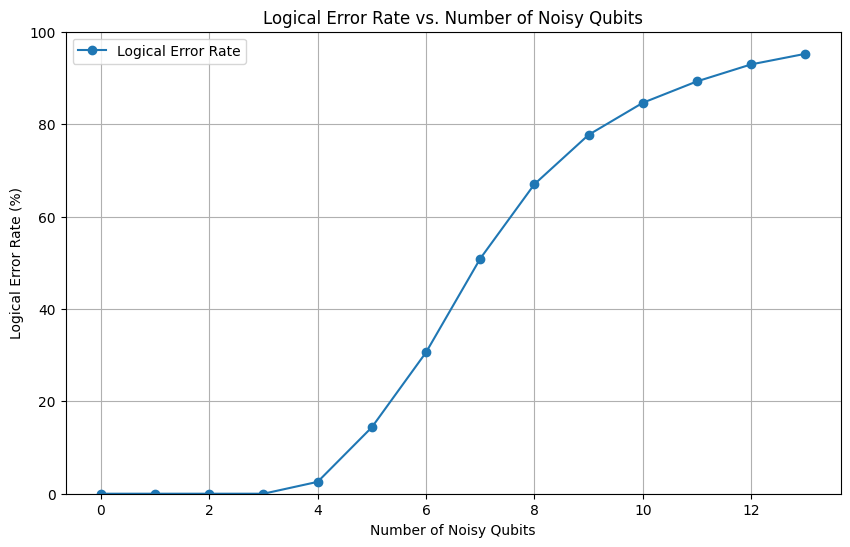

In [33]:
# Parameters
num_samples = 10  # Number of configurations to sample for each noisy qubit count
num_shots = 100_000  # Number of shots for each simulation

# Run simulations
results = run_pymatching_simulations(num_samples, num_shots, 0.5, noise_type="DEPOLARIZE1")

plot_pymatching_results(results)


### with depolarizing noise on k qubits with i.i.d 0.1 noise probability:

Noisy qubit count:   0%|          | 0/16 [00:00<?, ?it/s]

Too many failures for 13 noisy qubits. Skipping.
Too many failures for 14 noisy qubits. Skipping.
Too many failures for 15 noisy qubits. Skipping.


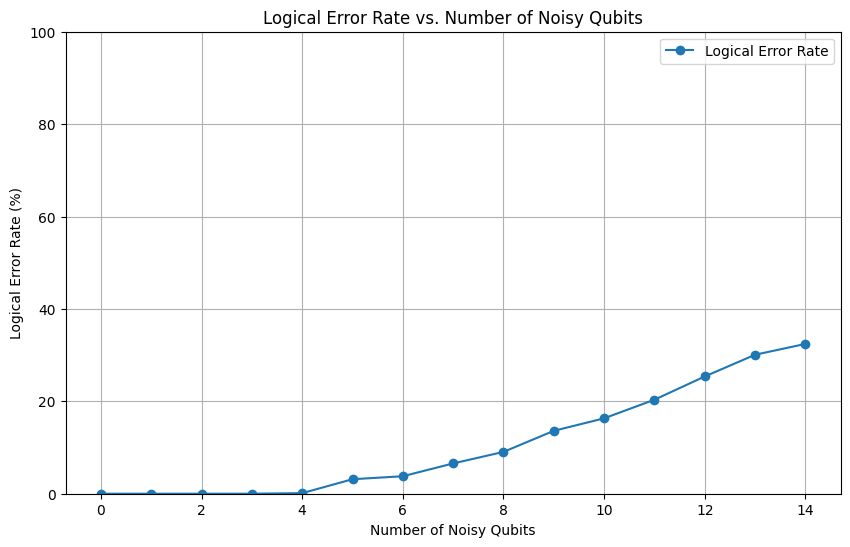

In [34]:
# Parameters
num_samples = 10  # Number of configurations to sample for each noisy qubit count
num_shots = 100_000  # Number of shots for each simulation

# Run simulations
results = run_pymatching_simulations(num_samples, num_shots,0.1, noise_type="DEPOLARIZE1")

plot_pymatching_results(results)

### with depolarizing noise on k qubits with i.i.d almost-fully-deploarizing noise probability:
Note that we're taking almost fully depolarizing and not fully depolarizing because of some issue in Stim
see
https://quantumcomputing.stackexchange.com/questions/32560/using-deterministic-errors-in-stim-detector-circuit-and-decoding-with-pymatching


Noisy qubit count:   0%|          | 0/16 [00:00<?, ?it/s]

Too many failures for 12 noisy qubits. Skipping.
Too many failures for 13 noisy qubits. Skipping.
Too many failures for 14 noisy qubits. Skipping.
Too many failures for 15 noisy qubits. Skipping.


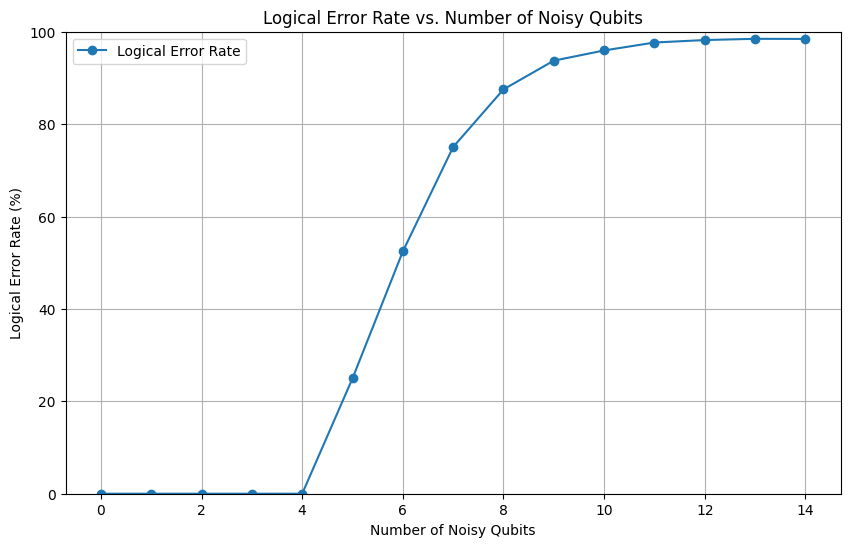

In [35]:
# Parameters
num_samples = 10  # Number of configurations to sample for each noisy qubit count
num_shots = 100_000  # Number of shots for each simulation

# Run simulations
results = run_pymatching_simulations(num_samples, num_shots,0.74999, noise_type="DEPOLARIZE1")

plot_pymatching_results(results)

### with Pauli-X noise on k qubits with i.i.d 1 noise probability:

Why is the graph so noisy? Is it because pymatching knows that an X_error is probable and handles that apropriately? Doesn't explain why the error rate keeps increasing though...

Noisy qubit count:   0%|          | 0/16 [00:00<?, ?it/s]

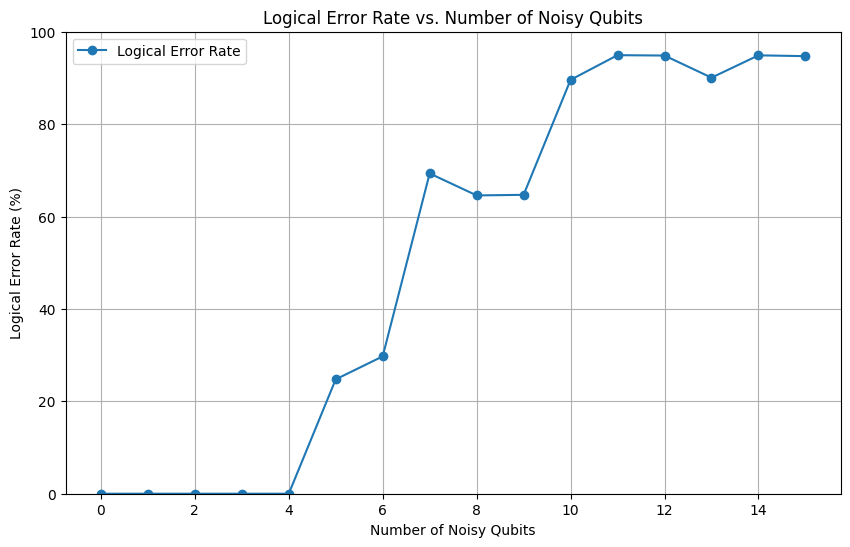

In [39]:
# Parameters
num_samples = 20  # Number of configurations to sample for each noisy qubit count
num_shots = 100_000  # Number of shots for each simulation

# Run simulations
results = run_pymatching_simulations(num_samples, num_shots, 0.99, noise_type="X_ERROR")

plot_pymatching_results(results)


Noisy qubit count:   0%|          | 0/16 [00:00<?, ?it/s]

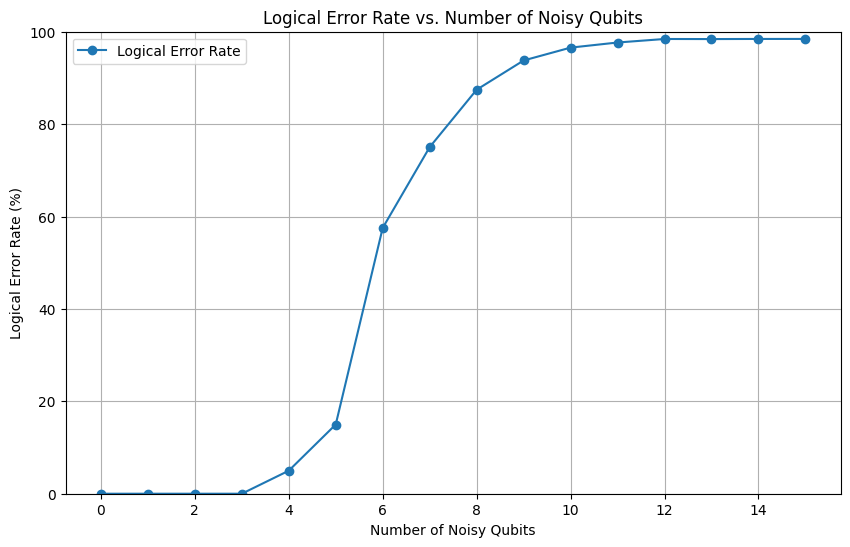

In [37]:
# Parameters
num_samples = 10  # Number of configurations to sample for each noisy qubit count
num_shots = 100_000  # Number of shots for each simulation

# Run simulations
results = run_pymatching_simulations(num_samples, num_shots, 0.5, noise_type="X_ERROR")

plot_pymatching_results(results)


## Fixed number of faulty qubits, varying error rate

In [46]:
# Assuming init_circuit(), encode(), channel(), error_correction(), and count_logical_errors() are predefined
def run_pymatching_error_rate_simulations(
        fixed_num_noisy, num_samples, num_shots, error_probabilities, run_with_reference_circuit=False
):
    results = []
    num_qubits = 16

    for error_probability in tqdm(error_probabilities, desc="Error probability"):
        logical_error_rates = []
        attempts = 0

        while len(logical_error_rates) < num_samples:
            try:
                # Sample fixed noisy qubits
                noise_qubits_list = random.sample(range(num_qubits), fixed_num_noisy)

                # Build the circuit
                circuit = init_circuit()
                encode(circuit)
                channel(circuit, error_probability, noise_qubits_list)
                error_correction(circuit)

                num_logical_errors = 0
                if run_with_reference_circuit:
                    noiseless_reference_circuit = init_circuit()
                    encode(noiseless_reference_circuit)
                    error_correction(noiseless_reference_circuit)

                    # Simulate and count logical errors
                    num_logical_errors = count_logical_errors(
                        circuit, num_shots, noiseless_reference_circuit=noiseless_reference_circuit
                    )
                else:
                    num_logical_errors = count_logical_errors(circuit, num_shots)
                logical_error_rate = num_logical_errors / num_shots
                logical_error_rates.append(logical_error_rate)
            except Exception as e:
                # If an error occurs, skip this configuration and try another
                attempts += 1
                if attempts > num_samples * 20:  # Failsafe to avoid infinite loops
                    print(f"Too many failures for error probability {error_probability:.2f}. Skipping.")
                    break

        # If we have enough samples, calculate the average logical error rate
        if logical_error_rates:
            avg_logical_error_rate = sum(logical_error_rates) / len(logical_error_rates)
            results.append((error_probability, avg_logical_error_rate))
        else:
            results.append((error_probability, None))  # No valid data for this error probability

    return results


def plot_pymatching_error_rate_results(results):
    # Extract results
    x = [error_probability for error_probability, _ in results]
    y = [logical_error_rate * 100 if logical_error_rate is not None else None for _, logical_error_rate in results]

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, marker='o', label="Logical Error Rate")
    plt.title("Logical Error Rate vs. Error Probability")
    plt.xlabel("Physical Error Probability")
    plt.ylabel("Logical Error Rate (%)")
    plt.ylim(0, 100)
    plt.grid(True)
    plt.legend()
    plt.show()


In [ ]:
## all qubits noisy. varying error rate

In [0]:
# Parameters
fixed_num_noisy = 16  # Fixed number of noisy qubits
num_samples = 10  # Number of configurations to sample for each error probability
num_shots = 100_000  # Number of shots for each simulation
error_rate_steps = 21  # Number of error probabilities to test (0 to 1 inclusive)
error_probabilities = np.linspace(0, 1, error_rate_steps)

# Run simulations
results = run_pymatching_error_rate_simulations(
    fixed_num_noisy, num_samples, num_shots, error_probabilities
)

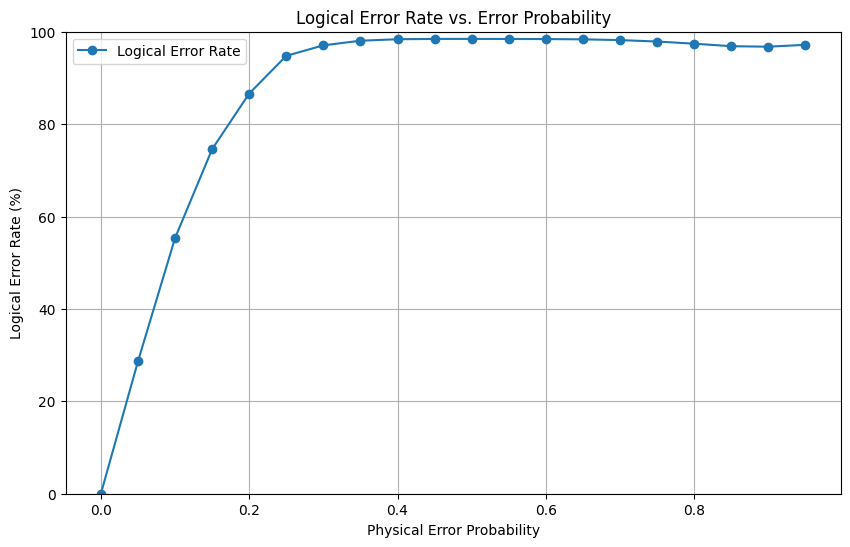

In [43]:
# Plot results
plot_pymatching_error_rate_results(results)


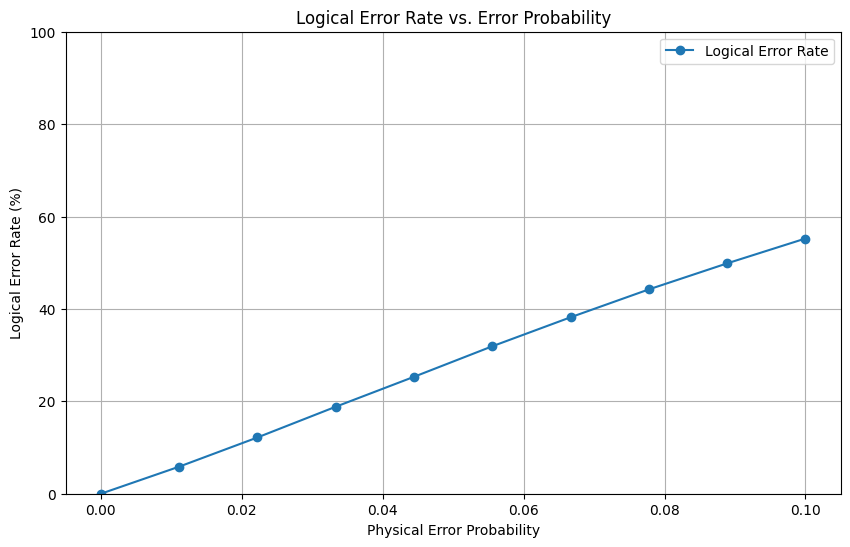

Error probability:   0%|          | 0/21 [00:00<?, ?it/s]

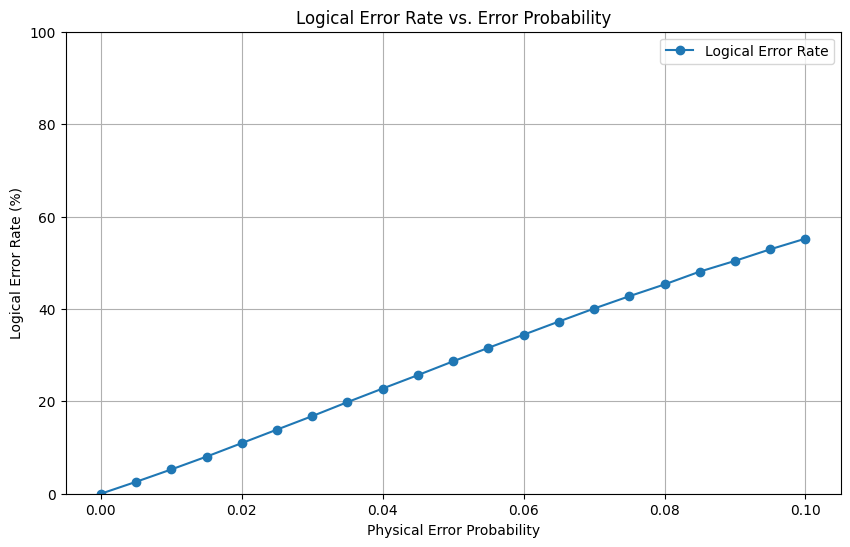

In [48]:
# Parameters
fixed_num_noisy = 16  # Fixed number of noisy qubits
num_samples = 10  # Number of configurations to sample for each error probability
num_shots = 100_000  # Number of shots for each simulation
error_rate_steps = 21  # Number of error probabilities to test (0 to 1 inclusive)
error_probabilities = np.linspace(0, 0.1, error_rate_steps)

# Run simulations
results = run_pymatching_error_rate_simulations(
    fixed_num_noisy, num_samples, num_shots, error_probabilities
)

# Plot results
plot_pymatching_error_rate_results(results)

In [ ]:
circuit.diagram("timeline-text")

In [108]:
circuit.to_crumble_url()

'https://algassert.com/crumble#circuit=Q(0,0)0;Q(1,0)1;Q(2,0)2;Q(3,0)3;Q(0,1)4;Q(1,1)5;Q(2,1)6;Q(3,1)7;Q(0,2)8;Q(1,2)9;Q(2,2)10;Q(3,2)11;Q(0,3)12;Q(1,3)13;Q(2,3)14;Q(3,3)15;MPP_X0*X1*X2*X3*X4*X5*X6*X7;TICK;MPP_X4*X5*X6*X7*X8*X9*X10*X11;TICK;MPP_X8*X9*X10*X11*X12*X13*X14*X15;TICK;MPP_X0*X1*X4*X5*X8*X9*X12*X13;TICK;MPP_X1*X2*X5*X6*X9*X10*X13*X14;TICK;MPP_Z0*Z1*Z2*Z3*Z4*Z5*Z6*Z7;TICK;MPP_Z4*Z5*Z6*Z7*Z8*Z9*Z10*Z11;TICK;MPP_Z8*Z9*Z10*Z11*Z12*Z13*Z14*Z15;TICK;MPP_Z0*Z1*Z4*Z5*Z8*Z9*Z12*Z13;TICK;MPP_Z1*Z2*Z5*Z6*Z9*Z10*Z13*Z14;TICK;TICK;X_ERROR(0.5)0;TICK;MPP_X0*X1*X2*X3*X4*X5*X6*X7;TICK;MPP_X4*X5*X6*X7*X8*X9*X10*X11;TICK;MPP_X8*X9*X10*X11*X12*X13*X14*X15;TICK;MPP_X0*X1*X4*X5*X8*X9*X12*X13;TICK;MPP_X1*X2*X5*X6*X9*X10*X13*X14;TICK;MPP_Z0*Z1*Z2*Z3*Z4*Z5*Z6*Z7;TICK;MPP_Z4*Z5*Z6*Z7*Z8*Z9*Z10*Z11;TICK;MPP_Z8*Z9*Z10*Z11*Z12*Z13*Z14*Z15;TICK;MPP_Z0*Z1*Z4*Z5*Z8*Z9*Z12*Z13;TICK;MPP_Z1*Z2*Z5*Z6*Z9*Z10*Z13*Z14;TICK;DT_rec[-10]_rec[-20];DT_rec[-9]_rec[-19];DT_rec[-8]_rec[-18];DT_rec[-7]_rec[-17];DT_rec[-6]